### 1. chardet 설치
텍스트 파일의 인코딩을 자동감지 되도록 설정

In [2]:
!pip install chardet

### 2. Google Drive 마운트 및 경로 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3. 데이터셋 압축 해제

MAC유저

In [3]:
import zipfile
import os

def extract_and_fix_encoding(zip_file_path, extract_to):
    # ZIP 파일 열기
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            # 파일 이름을 인코딩 문제 해결
            try:
                # 먼저 UTF-8로 시도
                decoded_name = member.encode('cp437').decode('utf-8')
            except UnicodeDecodeError:
                # UTF-8이 실패하면 cp437로 해석
                decoded_name = member.encode('utf-8').decode('cp437')

            # 압축 해제할 파일의 경로 생성
            member_path = os.path.join(extract_to, decoded_name)

            # 디렉토리인 경우 디렉토리 생성
            if member.endswith('/'):
                os.makedirs(member_path, exist_ok=True)
            else:
                # 파일인 경우 압축 해제
                os.makedirs(os.path.dirname(member_path), exist_ok=True)
                with zip_ref.open(member) as source, open(member_path, 'wb') as target:
                    target.write(source.read())
        print(f'{zip_file_path} 압축 해제 완료.')

# 압축 파일이 있는 폴더 경로
zip_folder = '/content/drive/MyDrive/YOLO/k-food'

# 압축을 풀어야 할 경로
extract_path = '/content/YOLO/dataset'

# ZIP 파일들 목록
zip_files = ['한혜승.zip', '김지현.zip', '김수명.zip']

# 각각의 ZIP 파일 압축 해제
for zip_file in zip_files:
    zip_file_path = os.path.join(zip_folder, zip_file)
    extract_and_fix_encoding(zip_file_path, extract_path)

print("모든 압축 파일 해제 및 인코딩 문제 해결이 완료되었습니다.")

/content/drive/MyDrive/YOLO/k-food/한혜승.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김지현.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김수명.zip 압축 해제 완료.
모든 압축 파일 해제 및 인코딩 문제 해결이 완료되었습니다.


window유저

In [4]:
import zipfile
import os

# 압축 해제 함수 (인코딩 문제 없음)
def extract_zip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f'{zip_file_path} 압축 해제 완료.')

# 압축 파일이 있는 폴더 경로
zip_folder = '/content/drive/MyDrive/YOLO/k-food'

# 압축을 풀어야 할 경로
extract_path = '/content/YOLO/dataset'

# 압축 파일 목록 (인코딩 문제 없는 파일)
zip_files = ['손민지.zip', '김예지.zip']

# 각각의 ZIP 파일 압축 해제
for zip_file in zip_files:
    zip_file_path = os.path.join(zip_folder, zip_file)
    extract_zip(zip_file_path, extract_path)

print("압축 해제가 완료되었습니다.")

/content/drive/MyDrive/YOLO/k-food/손민지.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김예지.zip 압축 해제 완료.
압축 해제가 완료되었습니다.


### 4. 데이터셋 정리

In [5]:
import os
import shutil

# 중간 폴더 경로
middle_folder = '/content/YOLO/dataset/손민지'
# 상위 폴더 경로
parent_folder = '/content/YOLO/dataset'

# 중간 폴더 내의 모든 하위 폴더 및 파일을 상위 폴더로 이동
for item in os.listdir(middle_folder):
    item_path = os.path.join(middle_folder, item)
    new_path = os.path.join(parent_folder, item)

    # 같은 이름의 폴더나 파일이 상위 폴더에 이미 존재할 경우 삭제 후 이동
    if os.path.exists(new_path):
        if os.path.isdir(new_path):
            shutil.rmtree(new_path)  # 폴더일 경우 삭제
        else:
            os.remove(new_path)  # 파일일 경우 삭제

    shutil.move(item_path, parent_folder)  # 중간 폴더에서 상위 폴더로 이동

# 중간 폴더 삭제
shutil.rmtree(middle_folder)

print("손민지 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.")

손민지 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.


In [6]:
import os
import shutil

# 중간 폴더 경로
middle_folder = '/content/YOLO/dataset/김수명'
# 상위 폴더 경로
parent_folder = '/content/YOLO/dataset'

# 중간 폴더 내의 모든 하위 폴더 및 파일을 상위 폴더로 이동
for item in os.listdir(middle_folder):
    item_path = os.path.join(middle_folder, item)
    new_path = os.path.join(parent_folder, item)

    # 같은 이름의 폴더나 파일이 상위 폴더에 이미 존재할 경우 삭제 후 이동
    if os.path.exists(new_path):
        if os.path.isdir(new_path):
            shutil.rmtree(new_path)  # 폴더일 경우 삭제
        else:
            os.remove(new_path)  # 파일일 경우 삭제

    shutil.move(item_path, parent_folder)  # 중간 폴더에서 상위 폴더로 이동

# 중간 폴더 삭제
shutil.rmtree(middle_folder)

print("김수명 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.")

김수명 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.


MAC유저의 MACOSX 폴더 삭제

In [7]:
import os
import shutil

# _MACOSX 폴더 삭제 함수
def delete_macosx_folders(directory):
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            if dir_name == '__MACOSX':
                macosx_path = os.path.join(root, dir_name)
                print(f'찾은 _MACOSX 폴더: {macosx_path}')
                try:
                    shutil.rmtree(macosx_path, ignore_errors=True)  # 강제로 삭제
                    print(f'{macosx_path} 삭제 완료.')
                except Exception as e:
                    print(f'{macosx_path} 삭제 중 오류 발생: {e}')

# 압축 해제된 폴더 경로
dataset_directory = '/content/YOLO/dataset'

# _MACOSX 폴더 삭제 실행
delete_macosx_folders(dataset_directory)

찾은 _MACOSX 폴더: /content/YOLO/dataset/__MACOSX
/content/YOLO/dataset/__MACOSX 삭제 완료.


### 5. 데이터셋 확인

In [8]:
!ls -a /content/YOLO/dataset

송편	파김치	  고등어조림	      갈치구이	    동태찌개  비빔밥	    제육볶음
보쌈	숙주나물  오이소박이	      감자채볶음    된장찌개  삼겹살	    조개구이
파전	양념게장  깻잎장아찌	      감자탕	    두부김치  삼계탕	    족발
쫄면	비빔냉면  애호박볶음	      갓김치	    등갈비    소세지볶음    주꾸미볶음
식혜	김치찌개  고사리나물	      고등어구이    떡갈비    수육	    주먹밥
막국수	배추김치  시금치나물	      곱창구이	    떡국      순대	    찜닭
감자전	계란말이  미역줄기볶음	      김밥	    떡볶이    순두부찌개    추어탕
호박전	총각김치  메추리알장조림      김치볶음밥    만두국    숯불닭갈비    칼국수
김치전	간장게장  .		      김치찜	    매운무국  시래기국	    콩국수
전복죽	잔치국수  ..		      김치콩나물국  매운탕    약과	    콩나물국
수제비	갈치조림  .DS_Store	      꽈리고추무침  멸치볶음  약식	    콩나물무침
물냉면	연근조림  .ipynb_checkpoints  누룽지	    무국      어묵볶음	    콩자반
수정과	가지볶음  LA갈비	      닭갈비	    미역국    오징어채볶음  편육
무생채	열무국수  갈비구이	      닭계장	    백김치    육회	    한ᄀ

In [9]:
import os

#경로 설정
dataset_directory = '/content/YOLO/dataset'

#폴더 개수 확인
def count_folders(directory):
  folder_count = 0
  for item in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, item)):
      folder_count += 1
  return folder_count

#폴더 개수 출력
folder_count = count_folders(dataset_directory)
print(f'폴더 개수: {folder_count}')

폴더 개수: 107


### 6. 데이터셋 분할
8:2 비율로 학습/검증 데이터 나눔

In [10]:
import os
import shutil
import random

# 이미지와 라벨 파일들이 들어있는 경로
dataset_dir = '/content/YOLO/dataset'
output_dir = '/content/YOLO/yolo_dataset'

# train과 val 데이터가 저장될 폴더 경로
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

# 각 폴더가 없으면 생성
os.makedirs(train_dir + '/images', exist_ok=True)
os.makedirs(train_dir + '/labels', exist_ok=True)
os.makedirs(val_dir + '/images', exist_ok=True)
os.makedirs(val_dir + '/labels', exist_ok=True)

# 데이터 분할 비율 (예: 80%는 train, 20%는 val)
split_ratio = 0.8

# 중분류 폴더 순회
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)

    # 불필요한 폴더 제외
    if os.path.isdir(category_path) and category != '.ipynb_checkpoints':
        images_path = os.path.join(category_path, 'images')
        labels_path = os.path.join(category_path, 'labels')

        # 이미지와 라벨 폴더가 존재하는지 확인
        if os.path.exists(images_path) and os.path.exists(labels_path):
            # 이미지 파일 리스트 가져오기
            images = os.listdir(images_path)
            images = [img for img in images if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]  # 대소문자 구분 없이 이미지 파일만 선택
            random.shuffle(images)

            # 데이터 분할
            train_size = int(len(images) * split_ratio)
            train_images = images[:train_size]
            val_images = images[train_size:]

            # 짝이 맞는 파일만 복사
            def copy_files(image_list, destination_images, destination_labels):
                for img in image_list:
                    # 이미지 파일의 확장자 그대로 사용하여 라벨 파일과 매칭
                    label_file = os.path.splitext(img)[0] + '.txt'
                    if os.path.exists(os.path.join(labels_path, label_file)):  # 라벨 파일이 있는 경우에만
                        shutil.copy(os.path.join(images_path, img), os.path.join(destination_images, img))
                        shutil.copy(os.path.join(labels_path, label_file), os.path.join(destination_labels, label_file))
                    else:
                        print(f"Warning: {img}에 대한 라벨 파일이 존재하지 않습니다.")

            # train 데이터 복사
            copy_files(train_images, train_dir + '/images', train_dir + '/labels')

            # val 데이터 복사
            copy_files(val_images, val_dir + '/images', val_dir + '/labels')

print("데이터 분할이 완료되었습니다.")

데이터 분할이 완료되었습니다.


### 7. 데이터 구성 파일 생성
data.yaml 파일을 생성하여 YOLO 모델 학습에 필요한 정보 설정

In [11]:
# data.yaml 파일을 생성하는 코드
data_yaml = """
train: /content/YOLO/yolo_dataset/train/images  # train 이미지 경로
val: /content/YOLO/yolo_dataset/val/images      # val 이미지 경로

# 클래스 수
nc: 106  # 총 클래스 수

# 클래스 이름
names:
  - 갈비구이
  - 갈치구이
  - 고등어구이
  - 곱창구이
  - 닭갈비
  - 백김치
  - 떡갈비
  - 불고기
  - 삼겹살
  - 장어구이
  - 조개구이
  - 떡국
  - 무국
  - 미역국
  - 북엇국
  - 시래기국
  - 콩나물국
  - 콩자반
  - 편육
  - 갓김치
  - 깍두기
  - 무생채
  - 배추김치
  - 오이소박이
  - 총각김치
  - 파김치
  - 가지볶음
  - 고사리나물
  - 미역줄기볶음
  - 숙주나물
  - 시금치나물
  - 애호박볶음
  - 송편
  - 막국수
  - 물냉면
  - 비빔냉면
  - 수제비
  - 열무국수
  - 잔치국수
  - 쫄면
  - 칼국수
  - 콩국수
  - 꽈리고추무침
  - 도토리묵
  - 잡채
  - 콩나물무침
  - 김밥
  - 김치볶음밥
  - 누룽지
  - 비빔밥
  - 주먹밥
  - 감자채볶음
  - 두부김치
  - 떡볶이
  - 멸치볶음
  - 소세지볶음
  - 어묵볶음
  - 오징어채볶음
  - 제육볶음
  - 주꾸미볶음
  - 보쌈
  - 수정과
  - 식혜
  - 간장게장
  - 양념게장
  - 깻잎장아찌
  - 감자전
  - 계란말이
  - 김치전
  - 파전
  - 호박전
  - 갈치조림
  - 감자조림
  - 고등어조림
  - 두부조림
  - 메추리알장조림
  - 연근조림
  - 전복죽
  - 호박죽
  - 김치찌개
  - 닭계장
  - 동태찌개
  - 된장찌개
  - 순두부찌개
  - 갈비찜
  - 김치찜
  - 닭볶음탕
  - 수육
  - 순대
  - 족발
  - 찜닭
  - 갈비탕
  - 감자탕
  - 매운탕
  - 삼계탕
  - 추어탕
  - 약과
  - 약식
  - 한과
  - 육회
  - LA갈비
  - 등갈비
  - 숯불닭갈비
  - 만두국
  - 김치콩나물국
  - 매운무국
"""

# 파일 저장
yaml_file_path = '/content/YOLO/data.yaml'

with open(yaml_file_path, 'w') as file:
    file.write(data_yaml)

print("data.yaml 파일이 생성되었습니다.")

data.yaml 파일이 생성되었습니다.


### 8. YOLOv8 설치

In [12]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 52.2 MB/s eta 0:00:00


### 9. 데이터셋 최종 확인(id)

In [13]:
import os

# train과 val 라벨 파일 경로
train_labels_dir = '/content/YOLO/yolo_dataset/train/labels'
val_labels_dir = '/content/YOLO/yolo_dataset/val/labels'

# 확인할 클래스 ID 범위
class_ids = set(range(106))  # 0부터 105까지의 ID

# 각 라벨 파일의 ID가 0부터 105까지 있는지 확인하는 함수
def check_label_ids(labels_dir):
    missing_ids = set(class_ids)  # 모든 ID를 포함한 집합
    found_ids = set()

    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if parts:
                        try:
                            class_id = int(parts[0])  # 첫 번째 값이 클래스 ID인지 확인
                            found_ids.add(class_id)
                        except ValueError:
                            print(f"Warning: {label_file}에서 클래스 ID로 변환할 수 없는 값 발견: {parts[0]}")

    missing_ids -= found_ids  # 발견된 ID를 제외한 값

    return found_ids, missing_ids

# train과 val에서 ID 확인
train_found_ids, train_missing_ids = check_label_ids(train_labels_dir)
val_found_ids, val_missing_ids = check_label_ids(val_labels_dir)

# 결과 출력
print("Train 라벨 파일에서 발견된 ID:", sorted(train_found_ids))
print("Train 라벨 파일에서 누락된 ID:", sorted(train_missing_ids))
print("Val 라벨 파일에서 발견된 ID:", sorted(val_found_ids))
print("Val 라벨 파일에서 누락된 ID:", sorted(val_missing_ids))

Train 라벨 파일에서 발견된 ID: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
Train 라벨 파일에서 누락된 ID: []
Val 라벨 파일에서 발견된 ID: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
Val 라벨 파일에서 누락된 ID: []


### 10. YOLOv8l 모델 학습

In [14]:
from ultralytics import YOLO

# YOLOv8 모델 불러오기
model = YOLO('yolov8l.pt')

# 모델 학습
model.train(
    data=yaml_file_path,    # data.yaml 파일 경로
    epochs=50,              # 에포크 수
    batch=32,               # 배치 크기
    imgsz=640,              # 이미지 크기
    name='yolo_l', # 실험 이름
    save=True,              # 모델 저장 여부
    save_period=5,         # 모델 저장 주기 (기본 값은 마지막만 저장)
    workers=8,              # 데이터 로딩 워커 수
    amp=True,               # Automatic Mixed Precision 활성화
    project='/content/drive/MyDrive/YOLO/l_runs2',  # 결과 저장 경로
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 83.7M/83.7M [00:02<00:00, 38.5MB/s]


Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/YOLO/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YOLO/l_runs2, name=yolo_l, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 22.2M/22.2M [00:00<00:00, 393MB/s]


Overriding model.yaml nc=80 with nc=106

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 154MB/s]


AMP: checks passed ✅


train: Scanning /content/YOLO/yolo_dataset/train/labels... 69419 images, 98 backgrounds, 336 corrupt: 100%|██████████| 69419/69419 [00:56<00:00, 1221.04it/s]

train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0007.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0018.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0025.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0026.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0034.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0036.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0047.jpg: ignoring corrupt i

train: New cache created: /content/YOLO/yolo_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 84, len(boxes) = 70617. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/YOLO/yolo_dataset/val/labels... 17410 images, 21 backgrounds, 85 corrupt: 100%|██████████| 17410/17410 [00:14<00:00, 1182.00it/s]

val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0080.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0095.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0097.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0111.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0122.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0163.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0187.jpg: ignoring corrupt image/label: labels require 5

val: New cache created: /content/YOLO/yolo_dataset/val/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 16, len(boxes) = 17703. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/drive/MyDrive/YOLO/l_runs2/yolo_l/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 103 weight(decay=0.0), 110 weight(decay=0.0005), 109 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/YOLO/l_runs2/yolo_l
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      20.4G      1.388      5.207      1.949         78        640:   0%|          | 5/2159 [00:02<15:19,  2.34it/s]

       1/50      20.5G      1.375      5.177      1.931         85        640:   0%|          | 6/2159 [00:03<14:40,  2.45it/s]
100%|██████████| 755k/755k [00:00<00:00, 73.3MB/s]
       1/50      20.5G      1.033      3.399      1.473         79        640: 100%|██████████| 2159/2159 [11:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:24<00:00,  3.20it/s]


                   all      17325      17703      0.588      0.585        0.6      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      20.3G      1.074      1.944      1.439         64        640: 100%|██████████| 2159/2159 [11:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.27it/s]


                   all      17325      17703       0.64      0.657      0.691      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      20.5G      1.102      1.803      1.445         64        640: 100%|██████████| 2159/2159 [10:50<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:23<00:00,  3.24it/s]


                   all      17325      17703      0.627      0.585      0.622      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      20.3G      1.103      1.597       1.44         69        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:23<00:00,  3.26it/s]


                   all      17325      17703      0.738      0.723      0.782      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      20.6G      1.061      1.342      1.409         74        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.27it/s]


                   all      17325      17703      0.775      0.777      0.829      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      20.3G      1.042      1.224      1.394         67        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.27it/s]


                   all      17325      17703       0.81      0.806      0.859      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      20.5G      1.024       1.14      1.383         67        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.27it/s]


                   all      17325      17703      0.827      0.815      0.874       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      20.3G      1.011      1.084      1.374         73        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.28it/s]


                   all      17325      17703       0.83       0.84      0.887      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      20.5G      1.003      1.046      1.367         80        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.854      0.844      0.896      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      20.3G     0.9948      1.013       1.36         66        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.28it/s]


                   all      17325      17703       0.86      0.852      0.901      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      20.5G     0.9875     0.9851      1.357         65        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.866      0.854      0.907      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      20.3G     0.9794     0.9583      1.351         80        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.865      0.862      0.911      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      20.5G     0.9744     0.9354      1.347         68        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.873      0.862      0.914       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      20.3G     0.9675     0.9183      1.343         63        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.869      0.869      0.916      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      20.5G     0.9636        0.9       1.34         72        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.871      0.871      0.917      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      20.3G     0.9589     0.8845      1.337         76        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.873      0.872      0.918      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      20.5G     0.9532     0.8676       1.33         62        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.878       0.87       0.92      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      20.3G     0.9506     0.8566      1.331         80        640: 100%|██████████| 2159/2159 [10:50<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.879      0.871       0.92      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      20.5G     0.9475     0.8451      1.327         73        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.883       0.87      0.921      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      20.3G     0.9442      0.831      1.327         73        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.877      0.878      0.922       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      20.5G     0.9423     0.8191      1.324         67        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.881      0.877      0.923      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      20.3G     0.9363     0.8076       1.32         79        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.882      0.879      0.923      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      20.5G     0.9353     0.7975       1.32         63        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.881      0.881      0.924      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      20.3G     0.9266     0.7808      1.313         78        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.882      0.883      0.925      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      20.5G     0.9248     0.7733      1.312         75        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.885      0.882      0.926      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      20.3G     0.9222     0.7647       1.31         75        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.887      0.883      0.927      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      20.5G     0.9215     0.7523       1.31         68        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.888      0.883      0.927      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      20.3G     0.9159     0.7441      1.306         67        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.28it/s]


                   all      17325      17703      0.887      0.886      0.928      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      20.5G     0.9121      0.734      1.303         69        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.888      0.888      0.929      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      20.3G     0.9077     0.7205        1.3         69        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.891      0.888       0.93       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      20.5G     0.9023     0.7127      1.297         78        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.891       0.89      0.931      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      20.3G     0.8939     0.7003      1.293         70        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.892      0.891      0.931      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      20.5G     0.8947     0.6891      1.292         70        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.894      0.892      0.932      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      20.3G     0.8889     0.6816      1.288         67        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.897      0.891      0.933      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      20.5G     0.8833     0.6661      1.283         69        640: 100%|██████████| 2159/2159 [10:50<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.899       0.89      0.933      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      20.3G     0.8774     0.6537      1.282         76        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703        0.9      0.891      0.934      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      20.5G     0.8721     0.6451      1.278         70        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.901      0.892      0.934      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      20.3G     0.8674     0.6307      1.273         77        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.901      0.893      0.935      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      20.5G     0.8601     0.6225       1.27         70        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.903      0.893      0.936      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      20.3G     0.8554     0.6098      1.267         72        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.904      0.894      0.936      0.689
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      20.5G     0.8289     0.4259      1.379         27        640: 100%|██████████| 2159/2159 [10:50<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.904      0.895      0.937       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      20.3G      0.816     0.4056      1.366         28        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.905      0.895      0.938      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      20.5G     0.8037     0.3893      1.353         29        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.906      0.896      0.938      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      20.3G     0.7899      0.371      1.341         28        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.902      0.899      0.938      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      20.5G     0.7755     0.3574       1.33         27        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.905      0.899      0.938      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      20.3G     0.7611     0.3398      1.316         28        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.908      0.897      0.938      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      20.5G     0.7439     0.3255      1.303         27        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.907      0.898      0.939      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      20.9G     0.7305      0.312       1.29         27        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.908        0.9      0.939      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      20.6G     0.7132     0.3018      1.275         27        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.29it/s]


                   all      17325      17703      0.907      0.899      0.939      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      20.3G     0.6987     0.2903      1.265         27        640: 100%|██████████| 2159/2159 [10:49<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:22<00:00,  3.30it/s]


                   all      17325      17703      0.907        0.9      0.939      0.694

50 epochs completed in 10.212 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO/l_runs2/yolo_l/weights/last.pt, 79.5MB
Optimizer stripped from /content/drive/MyDrive/YOLO/l_runs2/yolo_l/weights/best.pt, 79.5MB

Validating /content/drive/MyDrive/YOLO/l_runs2/yolo_l/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 286 layers, 39,514,510 parameters, 0 gradients, 145.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:28<00:00,  3.06it/s]


                   all      17325      17703      0.906        0.9      0.939      0.694
                  갈치구이        179        182      0.908      0.934      0.957       0.65
                 고등어구이        179        182      0.907      0.912      0.938      0.645
                  곱창구이        154        156      0.901      0.754      0.871      0.423
                   닭갈비        136        138      0.918      0.942      0.976      0.571
                   백김치        173        175      0.941      0.954      0.964      0.523
                   떡갈비        166        175      0.862      0.909      0.896      0.579
                   불고기        123        123      0.927      0.827      0.914      0.535
                   삼겹살        172        178       0.83      0.769      0.851      0.485
                  장어구이        179        187      0.874      0.861      0.907      0.602
                  조개구이        144        149      0.798      0.671      0.755      0.348
                    떡

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a588485f60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.

### 11. 학습된 모델 로드 및 성능 평가

In [15]:
from ultralytics import YOLO

# 학습된 모델 로드 (best.pt 파일 경로 확인)
model = YOLO('/content/drive/MyDrive/YOLO/l_runs2/yolo_l/weights/best.pt')

# 검증 데이터로 성능 평가
metrics = model.val()

# mAP 등 성능 지표 출력
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 286 layers, 39,514,510 parameters, 0 gradients, 145.6 GFLOPs


val: Scanning /content/YOLO/yolo_dataset/val/labels.cache... 17410 images, 21 backgrounds, 85 corrupt: 100%|██████████| 17410/17410 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0080.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0095.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0097.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0111.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0122.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0163.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0187.jpg: ignoring corrupt image/label: labels require 5


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1083/1083 [01:52<00:00,  9.66it/s]


                   all      17325      17703      0.906        0.9      0.939      0.694
                  갈치구이        179        182      0.908      0.934      0.957       0.65
                 고등어구이        179        182      0.907      0.912       0.94      0.646
                  곱창구이        154        156        0.9      0.754      0.871      0.423
                   닭갈비        136        138      0.918      0.942      0.976      0.572
                   백김치        173        175      0.941      0.954      0.964      0.524
                   떡갈비        166        175      0.862      0.909      0.896       0.58
                   불고기        123        123      0.927      0.827      0.914      0.533
                   삼겹살        172        178       0.83      0.768      0.851      0.485
                  장어구이        179        187      0.875      0.861      0.907      0.602
                  조개구이        144        149      0.798      0.671      0.754      0.348
                    떡

### 12. Koreanize Matplotlib 라이브러리를 설치
시각화에서 한글 사용하기 위해

In [16]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 91.5 MB/s eta 0:00:00


### 13. 테스트 이미지로 모델 성능 확인 및 바운딩 박스 표시
검증 데이터 이미지로 성능 확인 및 바운딩 박스 그리기


image 1/1 /content/YOLO/yolo_dataset/val/images/Img_076_0577.jpg: 480x640 1 연근조림, 73.4ms
Speed: 3.6ms preprocess, 73.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


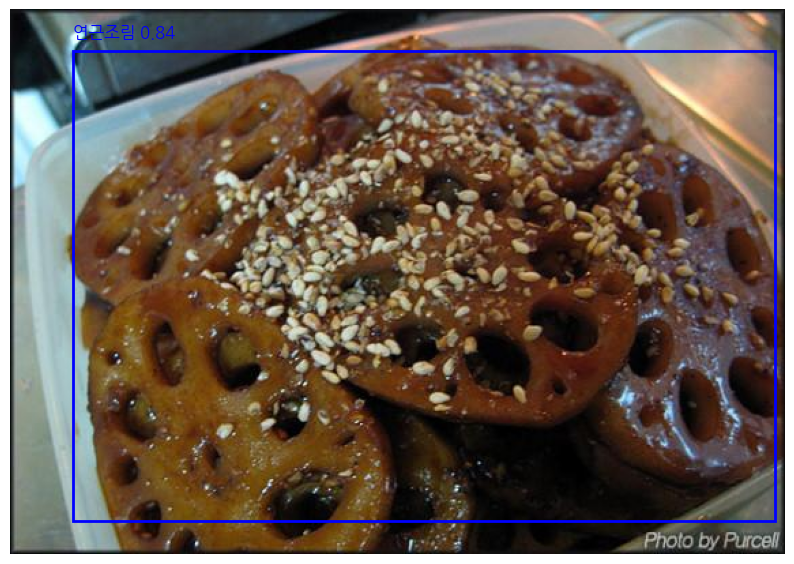

Randomly selected image: Img_076_0577.jpg


In [17]:
import os
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트 지원
import cv2

# 모델 로드
model = YOLO('/content/drive/MyDrive/YOLO/l_runs2/yolo_l/weights/best.pt')

# 검증 이미지 폴더 경로
val_images_dir = '/content/YOLO/yolo_dataset/val/images'

# 검증 데이터에서 랜덤으로 이미지 선택
random_image = random.choice(os.listdir(val_images_dir))

# 선택된 이미지 경로
random_image_path = os.path.join(val_images_dir, random_image)

# 선택된 이미지로 예측 수행
results = model.predict(random_image_path, conf=0.1)

# 이미지 불러오기
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 불러오므로 RGB로 변환

# 시각화 설정
plt.figure(figsize=(10, 10))
plt.imshow(img)

# 바운딩 박스 그리기 및 클래스 이름, 신뢰도 표시
for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

print(f"Randomly selected image: {random_image}")

### 14. 테스트 이미지로 모델 성능 확인 및 바운딩 박스 표시
새로운 테스트 이미지(객체 인식이 가능할 이미지)로 성능 확인 및 바운딩 박스 그리기

YOLOv8-Large모델


image 1/1 /content/drive/MyDrive/YOLO/test/test20.jpeg: 384x640 1 삼겹살, 1 잔치국수, 2 비빔밥s, 2 동태찌개s, 1 갈비탕, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


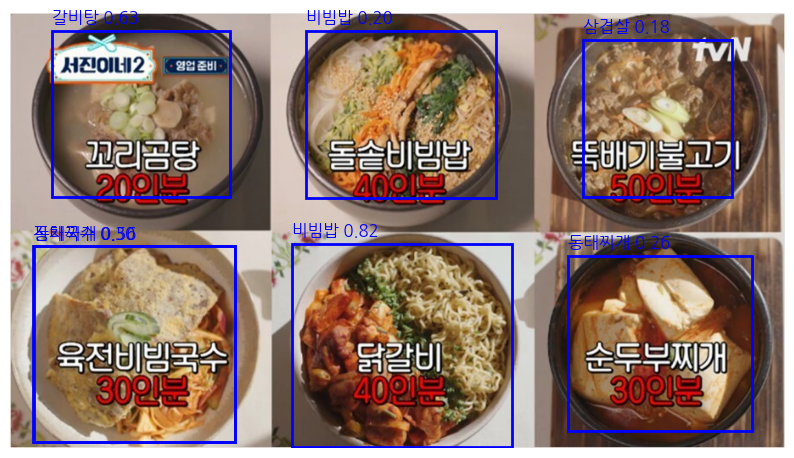

In [54]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/drive/MyDrive/YOLO/l_runs/yolo_l/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test/test20.jpeg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

YOLOv8-Medium모델


image 1/1 /content/drive/MyDrive/YOLO/test/test20.jpeg: 384x640 1 시래기국, 1 비빔밥, 2 동태찌개s, 1 갈비탕, 1 감자탕, 49.9ms
Speed: 1.9ms preprocess, 49.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


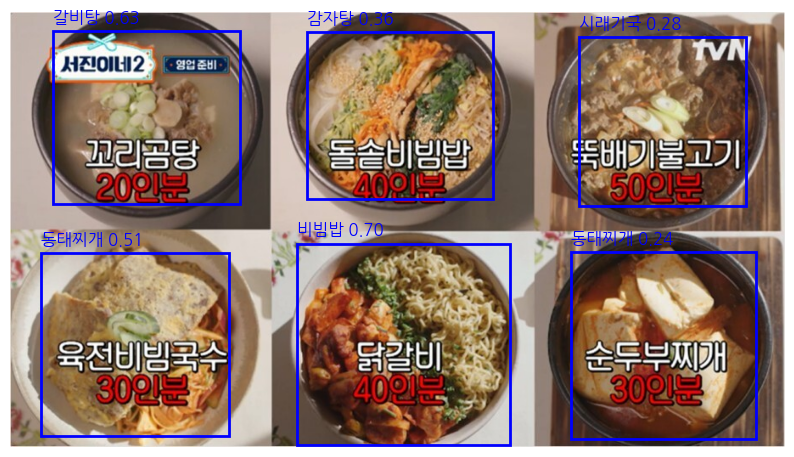

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/drive/MyDrive/YOLO/m_runs/yolo_m/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test/test20.jpeg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

### 15. 데이터 구성 파일 수정(data.yaml순서)
data.yaml 파일을 생성하여 YOLO 모델 학습에 필요한 정보 설정

In [57]:
# data.yaml 파일을 생성하는 코드
data_yaml = """
train: /content/YOLO/yolo_dataset/train/images  # train 이미지 경로
val: /content/YOLO/yolo_dataset/val/images      # val 이미지 경로

# 클래스 수
nc: 106  # 총 클래스 수

# 클래스 이름
names:
  - 갈비구이
  - 갈치구이
  - 고등어구이
  - 곱창구이
  - 닭갈비
  - 백김치
  - 떡갈비
  - 불고기
  - 삼겹살
  - 장어구이
  - 조개구이
  - 떡국
  - 무국
  - 미역국
  - 북엇국
  - 시래기국
  - 콩나물국
  - 콩자반
  - 편육
  - 갓김치
  - 깍두기
  - 무생채
  - 배추김치
  - 오이소박이
  - 총각김치
  - 파김치
  - 가지볶음
  - 고사리나물
  - 미역줄기볶음
  - 숙주나물
  - 시금치나물
  - 애호박볶음
  - 송편
  - 막국수
  - 물냉면
  - 비빔냉면
  - 수제비
  - 열무국수
  - 잔치국수
  - 쫄면
  - 칼국수
  - 콩국수
  - 꽈리고추무침
  - 도토리묵
  - 잡채
  - 콩나물무침
  - 김밥
  - 김치볶음밥
  - 누룽지
  - 비빔밥
  - 주먹밥
  - 감자채볶음
  - 두부김치
  - 떡볶이
  - 멸치볶음
  - 소세지볶음
  - 어묵볶음
  - 오징어채볶음
  - 제육볶음
  - 주꾸미볶음
  - 보쌈
  - 수정과
  - 식혜
  - 간장게장
  - 양념게장
  - 깻잎장아찌
  - 감자전
  - 계란말이
  - 김치전
  - 파전
  - 호박전
  - 갈치조림
  - 감자조림
  - 고등어조림
  - 두부조림
  - 메추리알장조림
  - 연근조림
  - 전복죽
  - 호박죽
  - 김치찌개
  - 닭계장
  - 동태찌개
  - 된장찌개
  - 순두부찌개
  - 갈비찜
  - 김치찜
  - 닭볶음탕
  - 수육
  - 순대
  - 족발
  - 찜닭
  - 갈비탕
  - 감자탕
  - 매운탕
  - 삼계탕
  - 추어탕
  - 약과
  - 약식
  - 한과
  - 육회
  - LA갈비
  - 등갈비
  - 숯불닭갈비
  - 만두국
  - 김치콩나물국
  - 매운무국

# 데이터 증강
augment:
  mosaic: True
  mixup: True
  fliplr: True
  flipud: True
  degrees: 15.0  # 회전 각도
"""

# 파일 저장
yaml_file_path = '/content/YOLO/data2.yaml'

with open(yaml_file_path, 'w', encoding='utf-8') as file:
    file.write(data_yaml)

print("data.yaml 파일이 생성되었습니다.")

data.yaml 파일이 생성되었습니다.


Large모델과 Medium모델의 mAP수치는 비슷하나 Large모델에서 더 많은 객체가 인식되었고 큰차이는 아니지만 예측률등이 높았음